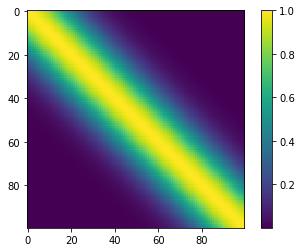

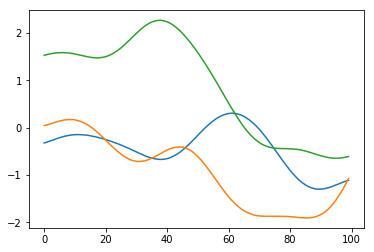

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def drawGP(L):
    T = L.shape[0];
    w = np.random.normal(0,1,(T,));
    x = np.dot(L, w)
    return x;

# helper for GP regression
def compute_K(tau, T, Ts):
    K = np.zeros((T, T));
    for i in range(T):
        for j in range(i,T):
            diff = (i-j)*Ts;
            K[i,j] = np.exp(-(np.abs(diff)**2) / (2*(tau**2)));
            if (i != j):
                K[j,i] = K[i,j];
    return K; 

tau = .15;
T = 100;
Ts = .01;
K = compute_K(tau, T, Ts);

plt.figure();
plt.imshow(K);
plt.colorbar();
plt.show()

sigma = .001;
noise = (sigma**2)*np.eye(T);

L = np.linalg.cholesky(K+noise);

x1 = drawGP(L);
x2 = drawGP(L);
x3 = drawGP(L);
plt.figure();
plt.plot(x1);
plt.plot(x2);
plt.plot(x3);
plt.show();

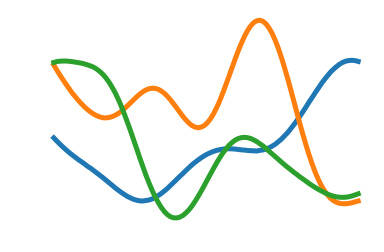

In [24]:
x1 = drawGP(L);
x2 = drawGP(L);
x3 = drawGP(L);
lw = 5;
plt.figure();
plt.plot(x1,lw=lw);
plt.plot(x2, lw=lw);
plt.plot(x3, lw=lw);
plt.axis('off');
plt.show();